In [3]:
from qiskit import BasicAer
from qiskit.algorithms import Grover, AmplificationProblem
from qiskit.circuit.library import PhaseOracle
from qiskit.utils import QuantumInstance
from qiskit.visualization import plot_histogram

In [29]:
log_expr = '((dev & jash) | (kpd & romil)) & ~(dev & kpd)'
oracle = PhaseOracle(log_expr)
prob = AmplificationProblem(oracle=oracle,is_good_state=oracle.evaluate_bitstring)
back = BasicAer.get_backend('qasm_simulator')
qinstance = QuantumInstance(back)
grover = Grover(quantum_instance=qinstance)

/var/folders/_p/gld_xpsx6ssd1xybm4qtnrl80000gn/T/ipykernel_42125/1899326063.py:5: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  qinstance = QuantumInstance(back)
/var/folders/_p/gld_xpsx6ssd1xybm4qtnrl80000gn/T/ipykernel_42125/1899326063.py:6: DeprecationWarning: ``qiskit.algorithms.amplitude_amplifiers.grover.Grover.__init__()``'s argument ``quantum_instance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the ``sampler`` argument. See https://qisk.it/algo_migration for a migration guide.
  grover = Grover(quantum_instance=qinstance)


In [30]:
result = grover.amplify(prob)
print(result)

{   'assignment': '1011',
    'circuit_results': [{'0011': 246, '1011': 270, '1100': 259, '1110': 249}],
    'iterations': [1],
    'max_probability': 0.263671875,
    'oracle_evaluation': True,
    'top_measurement': '1011'}


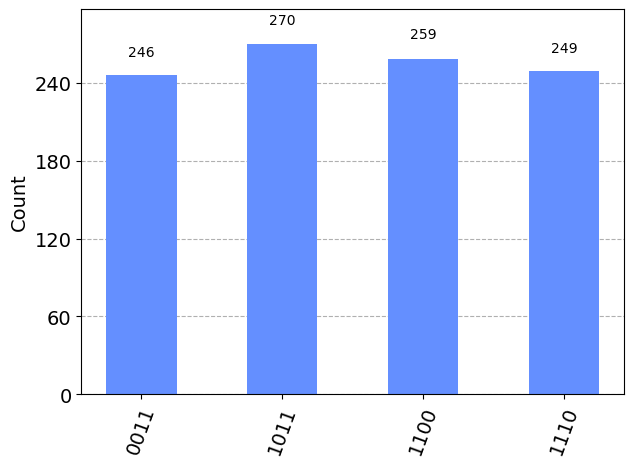

In [31]:
plot_histogram(result.circuit_results)